In [23]:
%matplotlib notebook
%pylab
%matplotlib inline

import pandas as pd
import glob

Using matplotlib backend: nbAgg
%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


/Users/mathadmin/opt/anaconda3/lib/python3.9/site-packages/IPython/core/magics/pylab.py:162: UserWarning: pylab import has clobbered these variables: ['time']
`%matplotlib` prevents importing * from pylab and numpy
  warn("pylab import has clobbered these variables: %s"  % clobbered +


In [24]:
def read_gauge_data(gauge_file, start_line):
    """
    Read gauge data from a gauge file, starting from a specified line.

    Parameters:
    gauge_file (str): Path to the gauge data file.
    start_line (int): Line number to start reading data from.

    Returns:
    tuple: A tuple containing time, water height (h), maximum water height (h_max),
           surface elevation (eta), and maximum surface elevation (eta_max).
    """
    with open(gauge_file, 'r') as f:
        data = f.read().splitlines()
        data1 = []
        for line in data[start_line:]:
            split_line = line.split()
            if split_line:  # Check if line is not empty
                data1.append([float(x) for x in split_line])
            
    data1 = array(data1)
    time = data1[:, 1]
    h = data1[:, 2]
    hu = data1[:, 3]
    hv = data1[:, 4]
    eta = data1[:, 5]

    eta_max = max(eta)
    h_max = max(h)

    return time, h, h_max, eta, eta_max

In [25]:
#  define start lines for geoflood and geoclaw data
geoflood_start_line = 2
geoclaw_start_line = 4
time, h, h_max, eta, eta_max = read_gauge_data('geoflood_gauge/gauge00001.txt', 2)
time1, h1, h_max1, eta1, eta_max1 = read_gauge_data('geoclaw_gauges/gauge00001.txt', 4)
print('h_geoflood_max = ', h_max, 'eta_geoflood_max = ', eta_max)
print('h_geoclaw_max = ', h_max1, 'eta_geoclaw_max = ', eta_max1)

h_geoflood_max =  17.8348 eta_geoflood_max =  1541.7941
h_geoclaw_max =  24.29531 eta_geoclaw_max =  1548.239


In [38]:
# Gauge Locations
gauge_locs =  ['Mid Canyon', 'Canyon Mouth', 'Wilford','Sugar City', 'Roberts', 'Rexburg']
# gauge_locs =  ['Mid Canyon', 'Canyon Mouth', 'Wilford', 'Teton Town','Sugar city', 'Roberts', 'Rexburg']
historical_max_depth= {'Teton Canyon': 15, 'Teton Canyon Mouth': 12, 'Wilford': 4,  'Teton Town': 3,'Sugar City': 3, 'Rexburg': 2.5,} # (m)

In [39]:
# Simulated data
geoclaw_max_h = []
geoflood_max_h = []
time_ = []

for i in range(1, 7):
    gauge_file = 'geoclaw_gauges/gauge0000' + str(i) + '.txt'
    time_gflood, h, h_max, eta, eta_max = read_gauge_data(gauge_file, geoclaw_start_line)
    geoclaw_max_h.append(h_max)
    
    gauge_file = 'geoflood_gauge/gauge0000' + str(i) + '.txt'
    time, h, h_max, eta, eta_max = read_gauge_data(gauge_file, geoflood_start_line)
    geoflood_max_h.append(h_max)

    time_.append(time_gflood)

#swap the last two elements
geoclaw_max_h[-1], geoclaw_max_h[-2] = geoclaw_max_h[-2], geoclaw_max_h[-1]
geoflood_max_h[-1], geoflood_max_h[-2] = geoflood_max_h[-2], geoflood_max_h[-1]
gauge_locs[-1], gauge_locs[-2] = gauge_locs[-2], gauge_locs[-1]


        

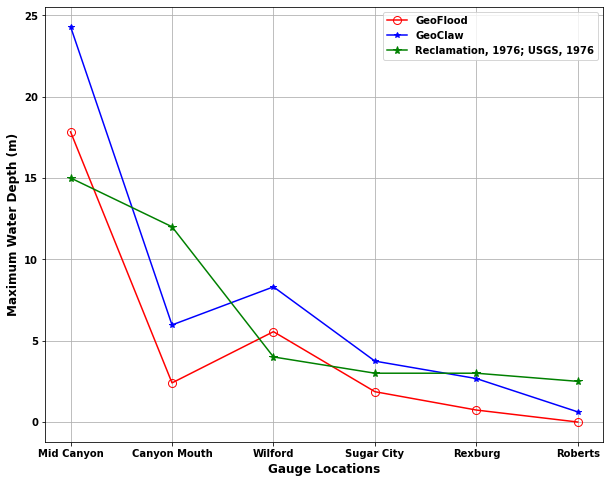

In [40]:

# plot the data
figsize(10,8)
figure(1)
plot(geoflood_max_h,'r-o',label='GeoFlood', markerfacecolor='None', markersize=8)
plot(geoclaw_max_h,'b-*',label='GeoClaw')
plot(historical_max_depth.values(),'g-*',label='Reclamation, 1976; USGS, 1976', markersize=8)

# # put marks for historical max depth
# for i in range(len(geoflood_max_h)):
#     # jump Teton Town since 
#     plot(i, historical_max_depth[gauge_locs[i]], 'g^', markersize=8)



xticks(range(len(geoflood_max_h)),gauge_locs)

xticks(fontweight='bold')
yticks(fontweight='bold')

legend(loc='upper right',prop={'size': 10, 'weight': 'bold'})
ylabel('Maximum Water Depth (m)',fontdict={'fontsize': 12, 'fontweight': 'bold'})
xlabel('Gauge Locations',fontdict={'fontsize': 12, 'fontweight': 'bold'})
grid()
savefig('gauge_maxdepth_teton.png')


